<h1>Import Pandas</h1>

In [3]:
import pandas as pd

C:\Users\incor\AppData\Local\Temp\ipykernel_22040\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
beans = pd.read_csv('diabetes.csv')
beans.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
beans.shape

(768, 9)

In [6]:
cols = [1,2,3,4,5,6,7,8]
df = beans[beans.columns[cols]]
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [8]:
cols = [8]
df1 = beans[beans.columns[8]]
df1.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

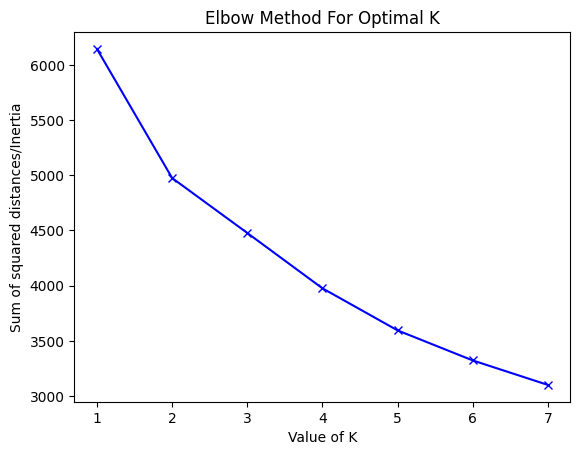

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
Sum_of_squared_distances = []
K = range(1,8)
for num_clusters in K :
    kmeans= KMeans(n_clusters=num_clusters)
    #X is the dataframe
    kmeans.fit(scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Value of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal K')
plt.show()

In [11]:
df1.unique()

array([1, 0], dtype=int64)

In [12]:
df1.replace(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
                        [1,2,3,4,5,6,7], inplace=True)

In [13]:
df1.tail()

763    0
764    0
765    0
766    1
767    0
Name: Outcome, dtype: int64

In [14]:
from sklearn import cluster

cls_bean = cluster.KMeans(n_clusters =2)
cls_model = cls_bean.fit(scaled)

In [15]:
print(cls_model.labels_)

[1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 1 0 1 0 0 0 

In [16]:
print(cls_model.cluster_centers_)

[[-0.45473446 -0.18719407 -0.20088271 -0.27562819 -0.31248313 -0.22645912
  -0.22137367 -0.57639118]
 [ 0.77931525  0.32080963  0.34426895  0.47236633  0.53552763  0.38810133
   0.37938597  0.9878082 ]]


In [17]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df,cls_model.labels_))

0.2060678300249137
